In [35]:
# imports
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, r2_score 
from datetime import datetime


import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
import util.util as util 
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold




In [2]:
# import data into dataframe 
df_training = pd.read_csv('training_dataset-1.csv',sep=",",header=0)
#  clean data 
df_training.dtypes
df_training.describe(include='all').round(2)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.761400e+04,17614,17614.00,17614.00,17614.00,17614.00,17614.00,17614.00,17614.00,17614.00,...,17614.00,17614.00,17614.00,17614.00,17614.00,17614.00,17614.00,17614.00,17614.00,17614.00
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.569068e+09,NaN,540851.36,3.37,2.11,2080.92,15133.10,1.50,0.01,0.23,...,7.66,1789.46,291.46,1970.92,80.77,98078.04,47.56,-122.21,1985.63,12680.01
std,2.869570e+09,NaN,368550.61,0.94,0.77,923.86,41943.62,0.54,0.08,0.77,...,1.18,831.42,443.42,29.43,393.29,53.47,0.14,0.14,685.58,26713.76
min,1.000102e+06,NaN,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,...,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,659.00
25%,2.122052e+09,NaN,322500.00,3.00,1.50,1420.00,5053.25,1.00,0.00,0.00,...,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1480.00,5100.00
50%,3.904985e+09,NaN,450000.00,3.00,2.25,1910.00,7607.00,1.50,0.00,0.00,...,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7600.00
75%,7.300200e+09,NaN,645000.00,4.00,2.50,2550.00,10650.00,2.00,0.00,0.00,...,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10057.25


In [3]:
# max bedroom is 33 
# remove row where bedroom = 33 (count =1) 
df_training.groupby('bedrooms')['id'].count()
df_training.drop(df_training[(df_training['bedrooms']==33)].index,inplace=True)

In [4]:
df_training.isnull().sum()
df_training.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
idCount = df_training.groupby('id')['id'].count()
idCount = idCount.sort_values(ascending = False)
idCount

id
1237500540    2
7520000520    2
5332200530    2
7524400250    2
8062900070    2
             ..
2767604592    1
2767604712    1
2767701416    1
2767704055    1
9900000190    1
Name: id, Length: 17493, dtype: int64

In [6]:
df_training[df_training['id']==1237500540]
#  seems like the same house with the same id was inserted twice, we should drop the older row 
#  1. convert date to datetime object for comparison 


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4376,1237500540,20141021T000000,225000,3,1.75,1370,10866,1.0,0,0,...,6,1370,0,1945,0,98052,47.6774,-122.164,1580,14250
9175,1237500540,20141222T000000,270000,3,1.75,1370,10866,1.0,0,0,...,6,1370,0,1945,0,98052,47.6774,-122.164,1580,14250


In [7]:
df_training['date'] = pd.to_datetime(df_training['date'])


In [8]:
df_training = df_training.sort_values(['id','date'],ignore_index=True)
df_training['date_order'] = df_training.groupby('id')['date'].rank(method='first',ascending=False)
df_training.sort_values(by=['id','date_order'], inplace = True)
df_training.drop_duplicates(subset=['id'],keep='first',inplace=True)
df_training[df_training['id']==1237500540]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_order
2255,1237500540,2014-12-22,270000,3,1.75,1370,10866,1.0,0,0,...,1370,0,1945,0,98052,47.6774,-122.164,1580,14250,1.0


In [9]:
idCount = df_training.groupby('id')['id'].count()
idCount = idCount.sort_values(ascending = False)
idCount[0:5]

id
1000102       1
6300500475    1
6300500875    1
6300500545    1
6300500515    1
Name: id, dtype: int64

In [10]:
df_training.describe(include='all').round(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_order
count,1.749300e+04,17493,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,...,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.0
mean,4.569021e+09,2014-10-29 20:30:10.186931968,542114.04,3.37,2.12,2083.20,15163.71,1.50,0.01,0.23,...,1791.62,291.58,1970.99,80.88,98077.99,47.56,-122.21,1986.85,12695.91,1.0
min,1.000102e+06,2014-05-02 00:00:00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,...,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,659.00,1.0
25%,2.122059e+09,2014-07-22 00:00:00,324950.00,3.00,1.50,1420.00,5050.00,1.00,0.00,0.00,...,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,1.0
50%,3.904950e+09,2014-10-17 00:00:00,450000.00,3.00,2.25,1910.00,7607.00,1.50,0.00,0.00,...,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7600.00,1.0
75%,7.300200e+09,2015-02-18 00:00:00,648000.00,4.00,2.50,2550.00,10655.00,2.00,0.00,0.00,...,2220.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2370.00,10070.00,1.0
max,9.900000e+09,2015-05-27 00:00:00,7700000.00,10.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,...,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00,1.0
std,2.870021e+09,NaN,368766.00,0.91,0.77,924.89,42058.31,0.54,0.08,0.77,...,832.47,443.63,29.45,393.55,53.45,0.14,0.14,685.87,26767.67,0.0


In [11]:
#remove datetime since linearRegression() does not accept datetime transform to integer
df_training = util.extract_date_component(df_training)
# drop the date table after the date data is processed
df_training = df_training.drop('date',axis=1) 
# reset the index to prepare for kfold
df_training = df_training.reset_index(drop=True)


In [12]:
# convert grade to letter results in a worse linear model 
# df_training.loc[(df_training['grade'] >= 1) & (df_training['grade'] <=3),'grade'] = 0
# df_training.loc[(df_training['grade'] > 3 ) & ( df_training['grade'] < 11),'grade'] = 1
# df_training.loc[(df_training['grade'] >= 11) & ( df_training['grade'] <=13),'grade'] = 2
# Rsquared = 0.734

In [13]:
# predictors that are qualitative: year, month, day, waterfront, view, condition, grade, zipcode, yr_built, yr_renovated
# next step: dummy encoding all the qualitative predictors
qltFeatures = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated','zipcode','sold_year','sold_month','sold_day']
qntFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15']
X_encoded = util.encoder(df_training, qltFeatures)
X_data = pd.concat([X_encoded,df_training[qntFeatures]],axis=1)
y = df_training['price']
X_data.dtypes



bedrooms           int64
bathrooms        float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sold_year          int32
sold_month         int32
sold_day           int32
sqft_living        int64
sqft_lot           int64
sqft_above         int64
sqft_basement      int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [14]:
X_data.describe(include='all').round(2)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,...,sold_month,sold_day,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,...,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00,17493.00
mean,3.37,2.12,1.50,0.01,0.23,3.41,7.66,1970.99,80.88,98077.99,...,6.56,15.72,2083.20,15163.71,1791.62,291.58,47.56,-122.21,1986.85,12695.91
std,0.91,0.77,0.54,0.08,0.77,0.65,1.18,29.45,393.55,53.45,...,3.12,8.62,924.89,42058.31,832.47,443.63,0.14,0.14,685.87,26767.67
min,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1900.00,0.00,98001.00,...,1.00,1.00,290.00,520.00,290.00,0.00,47.16,-122.52,399.00,659.00
25%,3.00,1.50,1.00,0.00,0.00,3.00,7.00,1951.00,0.00,98033.00,...,4.00,8.00,1420.00,5050.00,1190.00,0.00,47.47,-122.33,1490.00,5100.00
50%,3.00,2.25,1.50,0.00,0.00,3.00,7.00,1975.00,0.00,98065.00,...,6.00,16.00,1910.00,7607.00,1560.00,0.00,47.57,-122.23,1840.00,7600.00
75%,4.00,2.50,2.00,0.00,0.00,4.00,8.00,1997.00,0.00,98118.00,...,9.00,23.00,2550.00,10655.00,2220.00,560.00,47.68,-122.12,2370.00,10070.00
max,10.00,8.00,3.50,1.00,4.00,5.00,13.00,2015.00,2015.00,98199.00,...,12.00,31.00,13540.00,1651359.00,9410.00,4820.00,47.78,-121.32,6210.00,871200.00


In [15]:
linreg = LinearRegression()
# when comparing log vs non-log, log has a higher Rsquared 
# log R2 0.772 , non-log R2 0.692
y = np.log(y)
util.model_training(linreg, X_data, y)
X_sm = sm.add_constant(X_data)
est = sm.OLS(y,X_sm.astype(float)).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     2961.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:20:36   Log-Likelihood:                -609.88
No. Observations:               17493   AIC:                             1262.
Df Residuals:                   17472   BIC:                             1425.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -126.2627     13.856     -9.113

In [16]:
# examine each feature individually 
col = X_data.columns.tolist()
for i in col:
    print("----------",i,"------------")
    tempData =X_data[i].values.reshape(-1,1)
    X_sm = sm.add_constant(tempData)
    est = sm.OLS(y,X_sm.astype(float)).fit()
    print(est.summary())
# Note
# grade [R2:0.499, coef 0.31]
# yr build [R2: 0.006, coef: 0.0014]
# zipcode [R2: 0.001, coef -0.0003]
#  --> zipcode has a really weak r/s to price, the R2 is really low in comparison with 
#  with other features 


---------- bedrooms ------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     2466.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:20:36   Log-Likelihood:                -12395.
No. Observations:               17493   AIC:                         2.479e+04
Df Residuals:                   17491   BIC:                         2.481e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.36

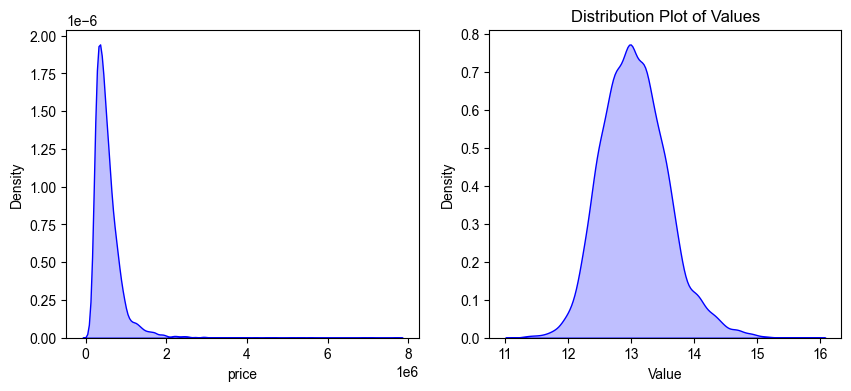

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # Change the figsize as needed
sns.set_style('whitegrid')  # Set the style of the plot
sns.kdeplot(df_training['price'], fill=True, color='blue',ax=axs[0])  # Create a kernel density plot
sns.kdeplot(np.log(df_training['price']), fill=True, color='blue',ax=axs[1])  # Create a kernel density plot

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution Plot of Values')
plt.show()

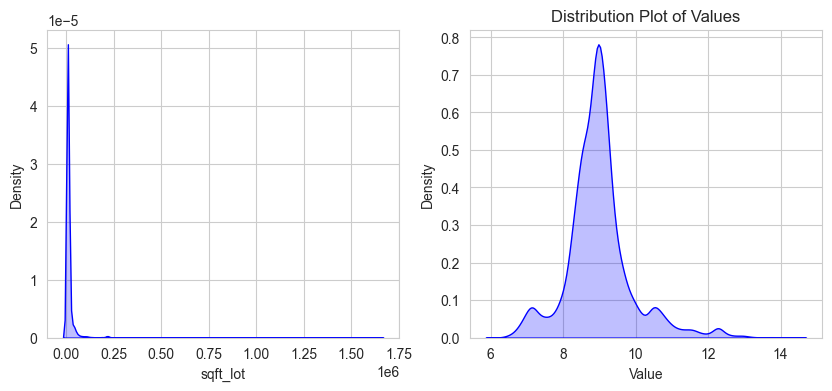

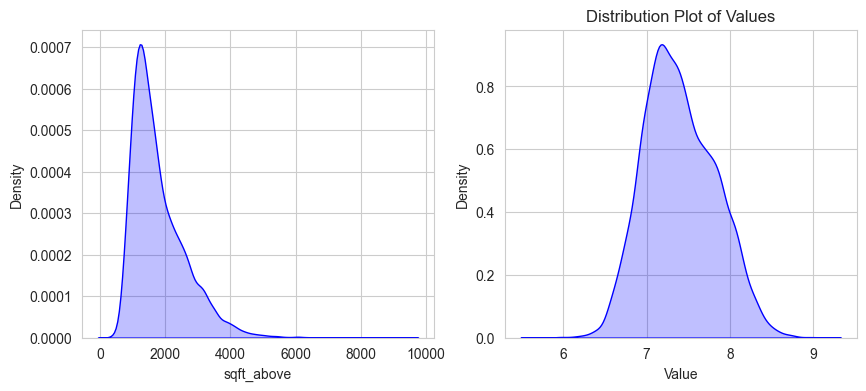

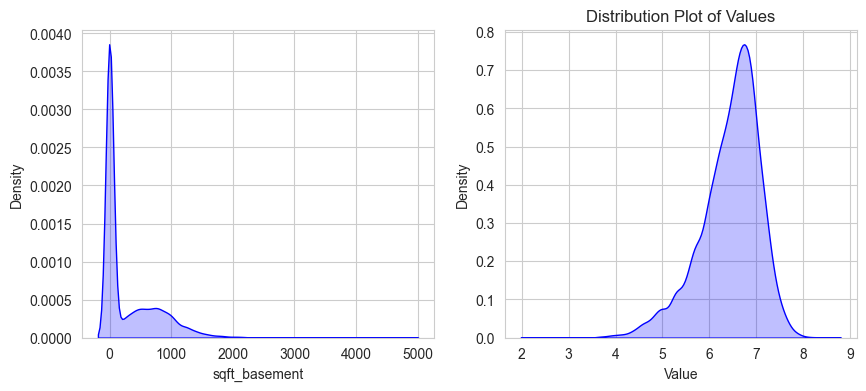

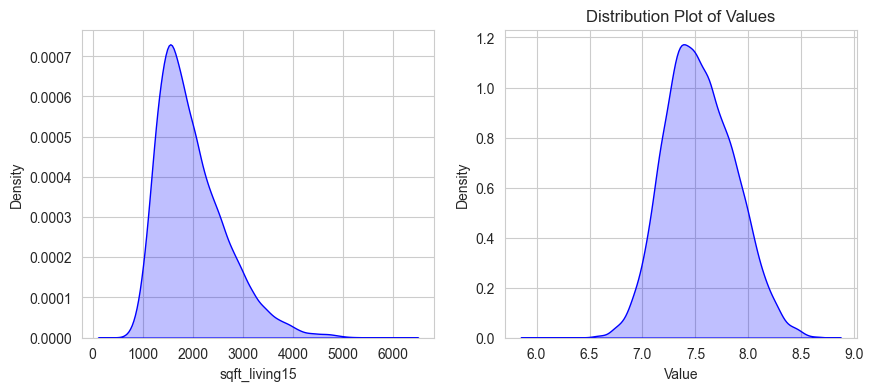

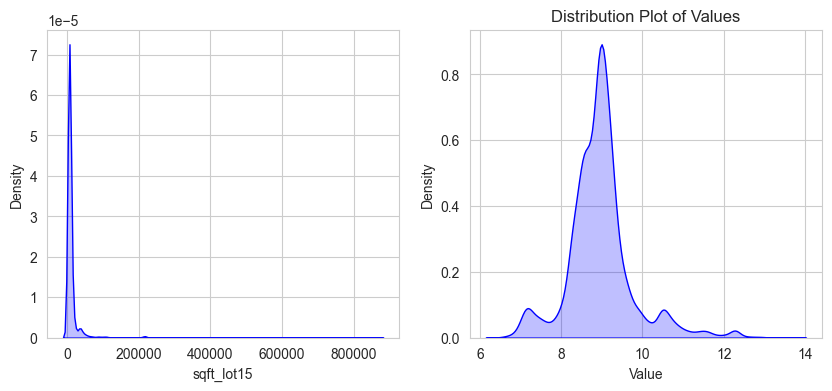

In [18]:
#sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
sqft = ['sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
for i in sqft:
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # Change the figsize as needed
    sns.set_style('whitegrid')  # Set the style of the plot
    sns.kdeplot(df_training[i], fill=True, color='blue',ax=axs[0])  # Create a kernel density plot
    sns.kdeplot(np.log(df_training[i]), fill=True, color='blue',ax=axs[1])  # Create a kernel density plot

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Distribution Plot of Values')
    plt.show()

In [19]:
# check if log transforms improves - R2 only improves from 0.772 to 0.776 - neglible, no need to log transform 

sqft = ['sqft_lot','sqft_above','sqft_living15','sqft_lot15','sqft_living']

X_sm = sm.add_constant(X_data)
x_temp = X_sm
for f in sqft:
    x_temp[f] = np.log(x_temp[f])
    print(f,"log ------------------ ")
    est = sm.OLS(y,x_temp.astype(float)).fit()
    print(est.summary())

sqft_lot log ------------------ 
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     2976.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:20:38   Log-Likelihood:                -577.15
No. Observations:               17493   AIC:                             1196.
Df Residuals:                   17472   BIC:                             1359.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const        

In [20]:
# feature selection
# 1. run through all feature selection 
# each run should use kfold (ie, for 1 model in subset, it should go through 5 folds and getting the MSE for that model )
#  compare models: linear regression, ridge, lasso 
# combinations to run through: 
# kfold: 
#   linear regression: best subset, forward, backward --> this should give which feature for linear regression is the best 
#   ridge 
#   lasso 
# output: cross_va_score gives a mse score
#

In [38]:
# import pandas as pd
# import numpy as np
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt

def cross_validate_subset(model_v, X_subset, y, n_splits):
    rmse_values = []
    model = model_v()
    r2_values = []

    # Check if X_subset is a DataFrame
    if isinstance(X_subset, pd.DataFrame):
        X_subset = X_subset.values  # Convert DataFrame to NumPy array

    # Ensure X_subset is 2D
    if X_subset.ndim == 1:
        X_subset = X_subset.reshape(-1, 1)
    elif X_subset.ndim == 2 and X_subset.shape[1] == 1:
        X_subset = X_subset.reshape(-1, 1)

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Check if y is a DataFrame or a Series
    if isinstance(y, pd.Series):
        y = y.values  # Convert Series to NumPy array

    for train_index, test_index in kf.split(X_subset):
        X_train, X_test = X_subset[train_index], X_subset[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        rmse_values.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_values.append(r2)

    avg_rmse = np.mean(rmse_values)
    avg_r2 = np.mean(r2_values)
    return avg_rmse, model, avg_r2 

lr, lr_model,lr_r2 = cross_validate_subset(LinearRegression,X_data,y,5)
ridge, ridge_model, ridge_r2 = cross_validate_subset(Ridge,X_data,y,5)
lasso, lasso_model, lasso_r2 = cross_validate_subset(Lasso,X_data,y,5)
print(f"Linear Regression RMSE: {lr}, R2: {lr_r2}")
print(f"Ridge: {ridge}, R2: {ridge_r2}")
print(f"Lasso: {lasso}, R2: {lasso_r2}")


Linear Regression RMSE: 0.25106601782402327, R2: 0.7710318748187274
Ridge: 0.2510667377826877, R2: 0.7710300197242651
Lasso: 0.35675621056274565, R2: 0.5376754356001582


In [39]:
# subset of data for lr to see if the model is more accurate 
qltFeatures_subset = ['bedrooms','bathrooms','floors','view','grade']
qntFeatures_subset = ['sqft_living','sqft_above','sqft_basement','sqft_living15']
X_encoded_subset = util.encoder(df_training, qltFeatures_subset)
X_data_subset = pd.concat([X_encoded_subset,df_training[qntFeatures_subset]],axis=1)

lr_subset, lr_model_subset, lr_subset_r2 = cross_validate_subset(LinearRegression,X_data_subset,y,5)
print(f"Linear Regression Subset RMSE: {lr_subset}, R2: {lr_subset_r2}")


Linear Regression Subset RMSE: 0.3375612617669329, R2: 0.5859777597205846


In [33]:
# Best model to use is Linear Regression, as it has the lowest R2 
df_test = pd.read_csv('test_dataset-1.csv',sep=",",header=0)
df_test.head()

df_test['date'] = pd.to_datetime(df_test['date'])
# #remove datetime since linearRegression() does not accept datetime transform to integer
df_test = util.extract_date_component(df_test)
# # drop the date table after the date data is processed
df_test = df_test.drop('date',axis=1) 
qltFeatures_df_test = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated','zipcode','sold_year','sold_month','sold_day']
qntFeatures_df_test = ['sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15']
X_encoded_df_test = util.encoder(df_test, qltFeatures_df_test)
X_data_df_test = pd.concat([X_encoded_df_test,df_test[qntFeatures_df_test]],axis=1)

# get prediction prices base on test data 
lr_y_pred = lr_model.predict(X_data_df_test)
# prep data to be written to output.csv
finalData = pd.concat([df_test['id'],pd.DataFrame(lr_y_pred,columns=['predicted price'])],axis=1)
file_path = 'output.csv'
# clear csv file 
with open(file_path,'w') as file:
    file.write('')
# write to csv file
finalData.to_csv(file_path,index=False)




In [ ]:
# # tried forward step selection, best model is similar to linear regression 

columns = X_data.columns.tolist()
combinations = len(columns)

minRMSE = 100
selection = 0
searchColumn = []
rmse_val = []
comb = 0
for i in range(0, combinations):
    for comb in range(0, len(columns)):
        if len(searchColumn) == 0: 
            comb_data =X_data[columns[comb]].values.reshape(-1,1)
        else:  
            comb_data = pd.concat([X_data[searchColumn], X_data[columns[comb]]],axis=1)
        avgRMSE,model = cross_validate_subset(LinearRegression,comb_data,y,5)
        if avgRMSE < minRMSE:
            minRMSE = avgRMSE
            selection = columns[comb]
        if len(columns) == 1: 
            selection = columns[comb]
    searchColumn.append(selection)
    columns.remove(selection)
    rmse_val.append(minRMSE)

print(minRMSE)
print(searchColumn)
delta = 0
for i in range(0, len(rmse_val)):
    print('feature: ', searchColumn[i],' RMSE: ', rmse_val[i], ' delta: ', delta-rmse_val[i])
    delta = rmse_val[i]

0.2510660178237999
['grade', 'lat', 'sqft_living', 'yr_built', 'view', 'bathrooms', 'sqft_living15', 'condition', 'floors', 'waterfront', 'sold_year', 'zipcode', 'long', 'yr_renovated', 'sqft_lot', 'bedrooms', 'sold_month', 'sqft_lot15', 'sqft_basement', 'sold_day', 'sqft_above']
feature:  grade  RMSE:  0.3715587170040578  delta:  -0.3715587170040578
feature:  lat  RMSE:  0.31690620607842296  delta:  0.054652510925634834
feature:  sqft_living  RMSE:  0.2846230873400355  delta:  0.03228311873838746
feature:  yr_built  RMSE:  0.27024092167644925  delta:  0.014382165663586244
feature:  view  RMSE:  0.263973555038888  delta:  0.006267366637561278
feature:  bathrooms  RMSE:  0.26160673417964997  delta:  0.0023668208592380058
feature:  sqft_living15  RMSE:  0.25940067351680685  delta:  0.0022060606628431234
feature:  condition  RMSE:  0.2574693732863849  delta:  0.0019313002304219284
feature:  floors  RMSE:  0.25581593350170906  delta:  0.0016534397846758586
feature:  waterfront  RMSE:  0.25

[12.68558551 12.99561663 12.59593505 ... 12.70638517 12.90337158
 12.35324621]


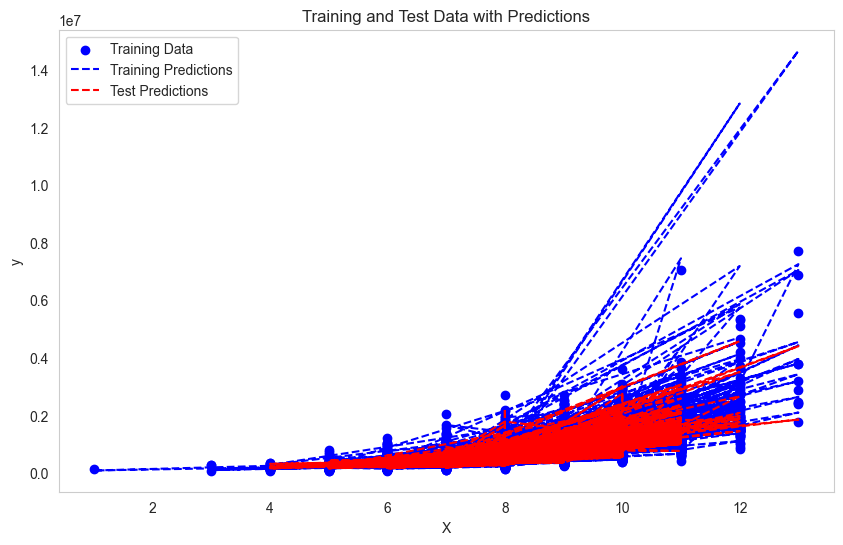

In [43]:
# plot test and training data against year sold and grade 
plt.figure(figsize=(10, 6))
y_train_pred = lr_model.predict(X_data)
print(y_train_pred)
# Plot the training data and predictions
plt.scatter(X_data['grade'], np.exp(y), label="Training Data", color='blue', marker='o')
plt.plot(X_data['grade'], np.exp(y_train_pred), label="Training Predictions", color='blue', linestyle='--')

# Plot the test data and predictions
plt.plot(X_data_df_test['grade'], np.exp(lr_y_pred), label="Test Predictions", color='red', linestyle='--')

plt.title("Training and Test Data with Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()

# Show the plot
plt.show() 


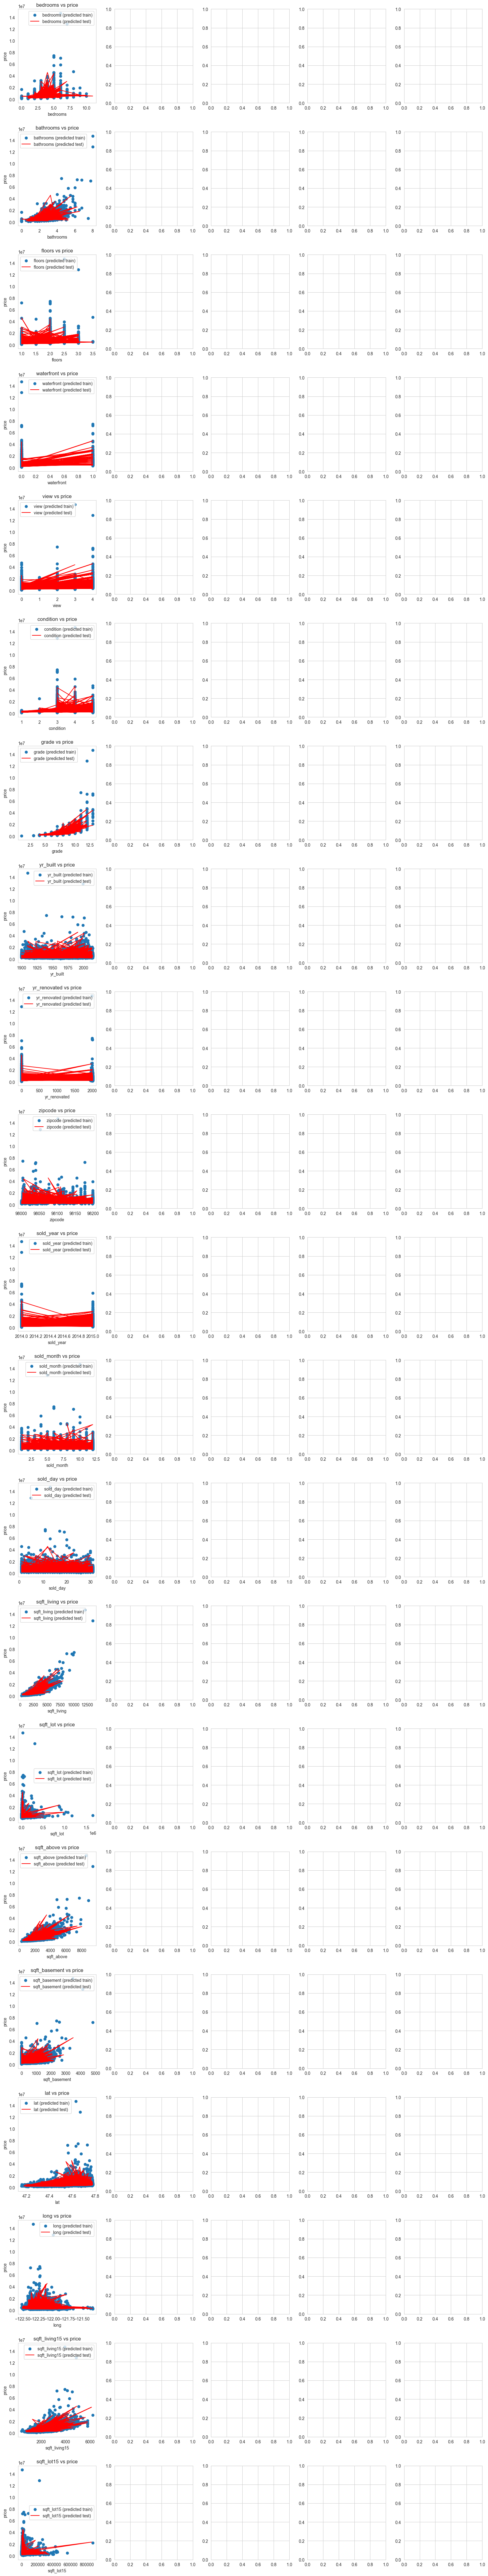

In [55]:
columns_to_compare = [col for col in X_data_df_test.columns]

# Loop through the columns and create individual subplots
num_rows = len(columns_to_compare)
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))

for i, column in enumerate(columns_to_compare):
    ax_row = axes[i]
    
    ax_row[0].scatter(X_data[column], np.exp(y_train_pred), label=f'{column} (predicted train)')
    ax_row[0].plot(X_data_df_test[column], np.exp(lr_y_pred), label=f'{column} (predicted test)', color='red')
    ax_row[0].set_title(f'{column} vs price')
    ax_row[0].set_xlabel(column)
    ax_row[0].set_ylabel('price')
    ax_row[0].legend()
    ax_row[0].grid()
for i in range(len(columns_to_compare), num_rows):
    for j in range(num_cols):
        fig.delaxes(axes[i][j])
plt.tight_layout()
plt.show()

In [ ]:
# best subset selection with kfold 
# issue: too much computation, parallelization requires some finagling - option discarded 
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# import itertools
# from concurrent.futures import ProcessPoolExecutor  # Use ProcessPoolExecutor from concurrent.futures

# # Create sample DataFrames for X and y (replace with your own data)
# X = X_data
# y = y

# # Define the number of folds and the model
# n_splits = 5
# model = LinearRegression()

# # Create a list of feature column names
# feature_columns = list(X.columns)

# # Create a list to store the results
# results = []

# # Define a function to perform cross-validation for a given feature subset
# def cross_validate_subset(features):
#     rmse_values = []
    
#     kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)
#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X.loc[train_index, list(features)], X.loc[test_index, list(features)]
#         y_train, y_test = y[train_index], y[test_index]
        
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         rmse = sqrt(mean_squared_error(y_test, y_pred))
#         rmse_values.append(rmse)
    
#     avg_rmse = sum(rmse_values) / len(rmse_values)
#     return (len(features), features, avg_rmse)

# # Use concurrent.futures to parallelize the work
# if __name__ == '__main__':
#     with ProcessPoolExecutor(max_workers=4) as executor:  # Adjust the number of workers based on your CPU cores
#         results = list(executor.map(cross_validate_subset, itertools.combinations(feature_columns, 2)))

#     # Find the best subset with the lowest average RMSE
#     best_result = min(results, key=lambda x: x[2])

#     print(f"Best Subset Size: {best_result[0]}")
#     print(f"Best Subset Features: {best_result[1]}")
#     print(f"Average RMSE: {best_result[2]}")
